In [1]:
import  numpy   as np
import pandas    as pd
import matplotlib.pyplot     as     plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 1000000
pd.options.display.max_columns = 100000

In [2]:
df=pd.read_csv('C:/Users/Amey Parekh/Capstone/SpotifyAudioFeaturesApril2019.csv/SpotifyAudioFeaturesApril2019.csv')

In [3]:
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [4]:
df.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [5]:
df=df.drop(['track_id','track_name'],axis=1)

### Binning the original data to create two classes in Y variable (popularity)

In [6]:
bins=[-1,38,100]
bins_name=[0,1]
df['popularity_class']=pd.cut(df['popularity'],bins=bins,labels=bins_name)
df['popularity_class']=pd.to_numeric(df['popularity_class'])

In [7]:
new_df=df.drop('popularity',axis=1)

In [8]:
new_df.head()

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class
0,YG,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,0
1,YG,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,1
3,Chris Cooq,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


### Feature Engineering:  creating new column  which is mean encoding of 'artist_name'

In [9]:
mean_encoding=new_df.groupby(by="artist_name").agg({'popularity_class':['mean']}).reset_index()
data = new_df.merge(mean_encoding,on='artist_name',how='left')

E:\Great_Learning\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
E:\Great_Learning\Anaconda\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [10]:
data.columns

Index([               'artist_name',               'acousticness',
                     'danceability',                'duration_ms',
                           'energy',           'instrumentalness',
                              'key',                   'liveness',
                         'loudness',                       'mode',
                      'speechiness',                      'tempo',
                   'time_signature',                    'valence',
                 'popularity_class', ('popularity_class', 'mean')],
      dtype='object')

In [11]:
data=data.drop(['artist_name'],axis=1)

In [12]:
data.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,"(popularity_class, mean)"
0,0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.409,203.927,4,0.118,0,0.75
1,0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.457,159.009,4,0.371,0,0.75


In [13]:
data.info()   #### final dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130663 entries, 0 to 130662
Data columns (total 15 columns):
acousticness                130663 non-null float64
danceability                130663 non-null float64
duration_ms                 130663 non-null int64
energy                      130663 non-null float64
instrumentalness            130663 non-null float64
key                         130663 non-null int64
liveness                    130663 non-null float64
loudness                    130663 non-null float64
mode                        130663 non-null int64
speechiness                 130663 non-null float64
tempo                       130663 non-null float64
time_signature              130663 non-null int64
valence                     130663 non-null float64
popularity_class            130663 non-null int64
(popularity_class, mean)    130663 non-null float64
dtypes: float64(10), int64(5)
memory usage: 16.0 MB


In [14]:
data['popularity_class'].value_counts() ### Y variable is dividend in 75-25 (3:1) ratio

0    99216
1    31447
Name: popularity_class, dtype: int64

In [15]:
##CHECKING FOR MULTICOLLINEARITY:

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns

vif.round(2)

,VIF Factor,features
0,3.84,acousticness
1,15.77,danceability
2,4.02,duration_ms
3,16.19,energy
4,2.07,instrumentalness
5,3.17,key
6,2.65,liveness
7,8.56,loudness
8,2.60,mode
9,2.08,speechiness


In [18]:
discard= vif[vif['VIF Factor']>15]
accept= vif[vif['VIF Factor']<15]

In [19]:
discard.features.values

array(['danceability', 'energy', 'tempo', 'time_signature'], dtype=object)

In [20]:
df_4=data.drop( ['danceability', 'energy', 'tempo', 'time_signature'], axis=1)

In [21]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_4.values, i) for i in range(df_4.shape[1])]
vif["features"] = df_4.columns

vif.round(2)

,VIF Factor,features
0,3.19,acousticness
1,3.21,duration_ms
2,1.99,instrumentalness
3,2.81,key
4,2.22,liveness
5,6.11,loudness
6,2.40,mode
7,1.90,speechiness
8,3.17,valence
9,4.79,popularity_class


###  Scaling the data for the problem:

In [22]:
x=data.drop('popularity_class',axis=1)
y=data[['popularity_class']]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
x_scaled=sc.fit_transform(x)

E:\Great_Learning\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Great_Learning\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
x.columns

Index([              'acousticness',               'danceability',
                      'duration_ms',                     'energy',
                 'instrumentalness',                        'key',
                         'liveness',                   'loudness',
                             'mode',                'speechiness',
                            'tempo',             'time_signature',
                          'valence', ('popularity_class', 'mean')],
      dtype='object')

In [27]:
x_scaled_df=pd.DataFrame((x_scaled), columns=['acousticness',               'danceability',
                      'duration_ms',                     'energy',
                 'instrumentalness',                        'key',
                         'liveness',                   'loudness',
                             'mode',                'speechiness',
                            'tempo',             'time_signature',
                          'valence',                
       ('popularity_class', 'mean')])
x_scaled_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,"(popularity_class, mean)"
0,-0.974080,0.849826,0.209005,-0.884312,-0.621709,-1.174649,-0.677783,0.350838,0.803395,2.388752,2.800232,0.235251,-1.241440,1.399712
1,-0.920325,1.391714,0.017595,-0.046852,-0.621709,0.768345,0.543208,0.414862,0.803395,2.774832,1.310884,0.235251,-0.264902,1.399712
2,-0.918589,0.113279,-0.598598,0.590848,-0.621709,1.045915,-0.670628,0.624050,-1.244718,-0.535807,-0.149450,0.235251,-0.222443,1.323375
3,-0.905859,1.149706,-0.708476,0.037663,1.909328,-0.064367,-0.569277,-0.327610,-1.244718,-0.337136,0.117033,0.235251,0.777254,-0.661406
4,-0.990817,1.060268,-0.719560,0.855916,1.814969,0.490774,-0.963952,-0.046299,0.803395,-0.369310,0.019020,0.235251,1.885026,-0.661406


In [28]:
x_scaled_df.shape

(130663, 14)

## LOGISTIC REGRESSION:

Why Logistic Regression
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is binary in nature which matches our problem statement

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier

In [95]:
log_model = LogisticRegression()###Base model1

### TRAIN TEST SPLIT :

In [97]:
from  sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 1)

In [99]:
log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
y_pred_log=log_model.predict(x_test)

In [108]:
y_pred_log1=log_model.predict_proba(x_test)[:,1]

## Logistic model evaluation: 

In [122]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [101]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Training set accuracy: {:.3f}".format(log_model.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(log_model.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred_log1))

Accuracy: 0.9273195744789408
Training set accuracy: 0.927
Test set accuracy: 0.927
roc_auc: 0.9767811895845984


In [110]:
print(confusion_matrix(y_test,y_pred_log))

[[28647  1142]
 [ 1707  7703]]


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29789
           1       0.87      0.82      0.84      9410

   micro avg       0.93      0.93      0.93     39199
   macro avg       0.91      0.89      0.90     39199
weighted avg       0.93      0.93      0.93     39199



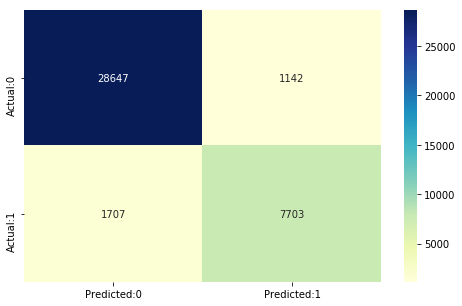

In [112]:
cm=confusion_matrix(y_test,y_pred_log)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### on cross validation:

In [185]:
for model,name in zip([log_model],["logistic"]):# Cross Validating by passing the complete scaled data
    error=[]
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    error=cross_val_score(model,x_scaled,y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9766691660851622 VAR: 0.0016703784574860557 logistic


###  LOGISTIC After feature selection via RFE CV:

In [131]:
from sklearn.feature_selection import RFECV, RFE
modelLR=LogisticRegression()

In [132]:
rfecv = RFECV(estimator=modelLR, step=1,scoring='roc_auc')
rfecv.fit(x,y)# Doing RFECV to get best number of Features
print("Optimal number of features for LR : %d" % rfecv.n_features_)

Optimal number of features for LR : 1


In [133]:
rfecv.ranking_                 
####  rfecv is classifying all features importance and assigning a ranking to features as given in scaled data and 
## classifying the feature engineered column(('popularity_class', 'mean')) as the most important one

array([ 7,  3, 14,  6,  4, 12,  5,  8, 11,  2, 13, 10,  9,  1])

In [149]:
x_scaled_df.columns[10]

'tempo'

#### removing the last 4 columns assigned as less important:

In [151]:
x_scaled_rfe= x_scaled_df[[  'acousticness',               'danceability',
                    'energy',
                 'instrumentalness',
                         'liveness',                   'loudness',
                                           'speechiness',
                             ('popularity_class', 'mean')]]

In [153]:
x_scaled_rfe.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,"(popularity_class, mean)"
0,-0.974080,0.849826,-0.884312,-0.621709,-0.677783,0.350838,2.388752,1.399712
1,-0.920325,1.391714,-0.046852,-0.621709,0.543208,0.414862,2.774832,1.399712
2,-0.918589,0.113279,0.590848,-0.621709,-0.670628,0.624050,-0.535807,1.323375
3,-0.905859,1.149706,0.037663,1.909328,-0.569277,-0.327610,-0.337136,-0.661406
4,-0.990817,1.060268,0.855916,1.814969,-0.963952,-0.046299,-0.369310,-0.661406


#### Train test split on the RFE selected columns:

In [170]:
log_model_rfe = LogisticRegression()

In [171]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled_rfe,y, test_size = 0.30, random_state = 1)

In [178]:
x_test1.shape, x_train1.shape,y_train1.shape, y_test1.shape

((39199, 8), (91464, 8), (91464, 1), (39199, 1))

In [172]:
log_model_rfe.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [173]:
y_pred_log2=log_model_rfe.predict(x_test1)

In [174]:
y_pred_log3=log_model_rfe.predict_proba(x_test1)[:,1]

In [186]:
# Model Accuracy, how well the model performs after RFE CV:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_log2))
print("Training set accuracy: {:.3f}".format(log_model_rfe.score(x_train1, y_train1)))
print("Test set accuracy: {:.3f}".format(log_model_rfe.score(x_test1, y_test1)))
print('roc_auc:',metrics.roc_auc_score(y_test1,y_pred_log3))

Accuracy: 0.9272430419143346
Training set accuracy: 0.927
Test set accuracy: 0.927
roc_auc: 0.9767681577930559


In [188]:
print(classification_report(y_test1,y_pred_log2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29789
           1       0.87      0.82      0.84      9410

   micro avg       0.93      0.93      0.93     39199
   macro avg       0.91      0.89      0.90     39199
weighted avg       0.93      0.93      0.93     39199



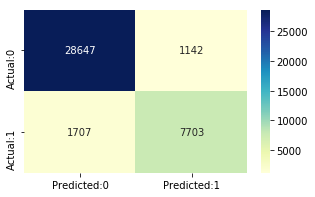

In [192]:
cm=confusion_matrix(y_test,y_pred_log)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

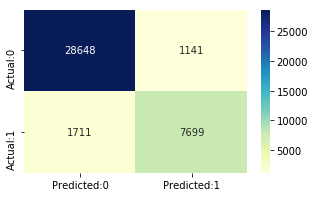

In [193]:
cm=confusion_matrix(y_test1,y_pred_log2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [187]:
for model,name in zip([log_model_rfe],["logistic"]):# Cross Validating by passing the complete scaled data( rfe selected)
    error=[]
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    error=cross_val_score(model,x_scaled_rfe,y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9767028463193501 VAR: 0.0016422457575698663 logistic


In [ ]:
### passing df_4 ... after vif score:

In [ ]:
for model,name in zip([log_model_rfe],["logistic"]):# Cross Validating by passing the complete scaled data( rfe selected)
    error=[]
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    error=cross_val_score(model,x_scaled_rfe,y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

## Naive Bayes:

In [113]:
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()

In [115]:
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
y_pred_NB=NB.predict(y_test)

## NB  MODEL EVALUATION: 

### checking the accuracy on Train/ Test split

In [117]:
# Model Accuracy, how well the model performs                            ##### model seems to be overfitting
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NB))
print("Training set accuracy: {:.3f}".format(NB.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(NB.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred_NB))

Accuracy: 1.0
Training set accuracy: 0.917
Test set accuracy: 0.918
roc_auc: 1.0


In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29789
           1       1.00      1.00      1.00      9410

   micro avg       1.00      1.00      1.00     39199
   macro avg       1.00      1.00      1.00     39199
weighted avg       1.00      1.00      1.00     39199



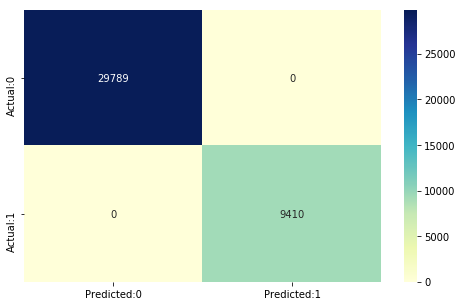

In [129]:
cm=confusion_matrix(y_test,y_pred_NB)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## checking the accuracy on cross validation:

In [126]:
for model,name in zip([NB],["Naive_Bayes"]):# Cross Validating by passing the complete scaled data
    error=[]
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    error=cross_val_score(model,x_scaled,y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9534619438340947 VAR: 0.0031256505660450283 Naive_Bayes


## DECISION TREE:

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier

In [98]:
DT = DecisionTreeClassifier()

In [100]:
from  sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 1)

In [102]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
y_pred=DT.predict(x_test)

In [104]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Training set accuracy: {:.3f}".format(DT.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(DT.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.8981861782188321
Training set accuracy: 1.000
Test set accuracy: 0.898
roc_auc: 0.8619838096846152


In [105]:
y_pred1=DT.predict_proba(x_test)[:,1]

In [106]:
y_pred1.shape

(39199,)

In [107]:
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred1))

roc_auc: 0.8627123913572929


In [108]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [109]:
print(confusion_matrix(y_test,y_pred))

[[27752  2037]
 [ 1954  7456]]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     29789
           1       0.79      0.79      0.79      9410

   micro avg       0.90      0.90      0.90     39199
   macro avg       0.86      0.86      0.86     39199
weighted avg       0.90      0.90      0.90     39199



<h2>Hyperparameter Tuning

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 0)

In [112]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [113]:
dt = DecisionTreeClassifier()

In [114]:
tuned = {'criterion': ['gini', 'entropy'], 'max_depth': range(7,15)}

In [115]:
dec = RandomizedSearchCV(dt, tuned, cv=10)

In [116]:
dec.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': range(7, 15)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [117]:
dec.best_params_

{'max_depth': 7, 'criterion': 'entropy'}

In [50]:
#Modeling using best params

In [118]:
dec_tree = DecisionTreeClassifier(max_depth=7, criterion='entropy')

In [119]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
y_pred = dec_tree.predict(x_test)

In [121]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Training set accuracy: {:.3f}".format(dec_tree.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(dec_tree.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.9272940636240721
Training set accuracy: 0.927
Test set accuracy: 0.927
roc_auc: 0.8846318165922443


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29836
           1       0.88      0.80      0.84      9363

   micro avg       0.93      0.93      0.93     39199
   macro avg       0.91      0.88      0.90     39199
weighted avg       0.93      0.93      0.93     39199



# AdaBoostClassifier

In [127]:
from sklearn.ensemble import AdaBoostClassifier

In [128]:
ada = AdaBoostClassifier(n_estimators=50,random_state=0) #default decision tree

In [129]:
ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

In [130]:
y_pred = ada.predict(x_test)

In [131]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Training set accuracy: {:.3f}".format(ada.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(ada.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.9281359218347407
Training set accuracy: 0.926
Test set accuracy: 0.928
roc_auc: 0.9021507381081157


In [132]:
tuned = {'n_estimators': np.arange(10,51,10)}

In [133]:
ada_hp = RandomizedSearchCV(ada, tuned, cv=10)

In [134]:
ada_hp.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': array([10, 20, 30, 40, 50])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [135]:
ada_hp.best_params_ #Therefore, we don't need to rebuild the model

{'n_estimators': 50}

<h2>Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
RF = RandomForestClassifier() #Base Model

In [138]:
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
y_pred=RF.predict(x_test)

In [140]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Training set accuracy: {:.3f}".format(RF.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(RF.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.9226255771830913
Training set accuracy: 0.995
Test set accuracy: 0.923
roc_auc: 0.8806856097966544


In [141]:
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred))

roc_auc: 0.8806856097966544


In [142]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [143]:
print(confusion_matrix(y_test,y_pred))

[[28672  1164]
 [ 1869  7494]]


In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29836
           1       0.87      0.80      0.83      9363

   micro avg       0.92      0.92      0.92     39199
   macro avg       0.90      0.88      0.89     39199
weighted avg       0.92      0.92      0.92     39199



# Hyperparameter Tuning

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 0)

In [147]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [148]:
rf = RandomForestClassifier()

In [149]:
tuned = {'criterion': ['gini', 'entropy'], 'max_depth': range(7,15), 'n_estimators': [50, 100, 200 ]}

In [150]:
rand = RandomizedSearchCV(rf, tuned, cv=10)

In [151]:
rand.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': range(7, 15), 'n_estimators': [50, 100, 200]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [152]:
rand.best_params_

{'n_estimators': 100, 'max_depth': 14, 'criterion': 'gini'}

In [153]:
ran = RandomForestClassifier(n_estimators = 100, max_depth =  14, criterion =  'gini') #Best Params

In [154]:
ran.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
y_pred=ran.predict(x_test)

In [156]:
# Model Accuracy, how well the model peranorms
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Training set accuracy: {:.3f}".format(ran.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(ran.score(x_test, y_test)))
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred))

Accuracy: 0.929411464578178
Training set accuracy: 0.952
Test set accuracy: 0.929
roc_auc: 0.8996907452362638


In [157]:
print('roc_auc:',metrics.roc_auc_score(y_test,y_pred))

roc_auc: 0.8996907452362638


In [158]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [159]:
print(confusion_matrix(y_test,y_pred))

[[28541  1295]
 [ 1472  7891]]


In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     29836
           1       0.86      0.84      0.85      9363

   micro avg       0.93      0.93      0.93     39199
   macro avg       0.90      0.90      0.90     39199
weighted avg       0.93      0.93      0.93     39199

